# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [162]:
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import  binom
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math
import numpy as np
import seaborn as sns


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

Intenté hacer el bucle pero preferí avanzar

In [60]:
mean=50
sigma=5
sample_size=[10, 50, 500, 5000]


s10= np.random.normal(mean, sigma,10)
s50= np.random.normal(mean, sigma,50)
s100= np.random.normal(mean, sigma,100)
s5000= np.random.normal(mean, sigma,5000)

print(stats.normaltest(s1))
print(stats.normaltest(s50))
print(stats.normaltest(s100))
print(stats.normaltest(s5000))

NormaltestResult(statistic=0.06965876344082848, pvalue=0.9657701802479216)
NormaltestResult(statistic=1.4170487243670018, pvalue=0.49237022177372314)
NormaltestResult(statistic=2.3771324466132895, pvalue=0.3046577622704452)
NormaltestResult(statistic=1.626201831780517, pvalue=0.44348073537370325)


#Comentario para mi
#normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.

If the p-val is very small, it means it is unlikely that the data came from a normal distribution. 

     is convenient to take this point as a limit in judging whether a deviation is to be considered significant or not. Deviations exceeding twice the standard deviation are thus formally regarded as significant

Fisher, R.A. (1925) Statistical Methods for Research Workers, p. 47
https://stats.stackexchange.com/questions/55691/regarding-p-values-why-1-and-5-why-not-6-or-10/55693#55693

#### Interpret the normaltest results and make your observations.

No se demuestra que a mayor número de muestras el p value sea mayor, de hecho el mayor valor se da en la muestra de 10 elementos


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

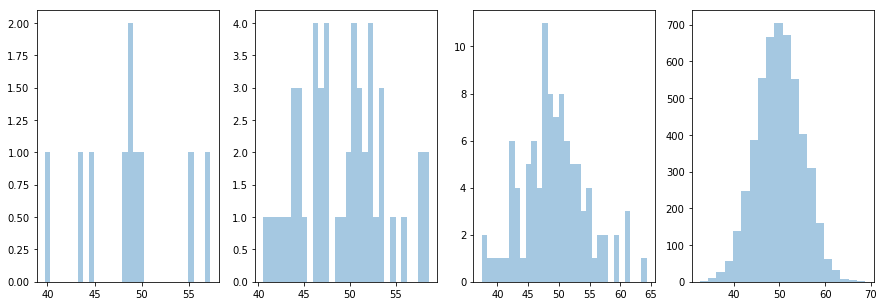

In [149]:
fig, axes = plt.subplots(1,4, figsize=(15,5))

sns.distplot(s1, bins=30, kde=False,ax=axes[0])
sns.distplot(s50, bins=30, kde=False,ax=axes[1])
sns.distplot(s100, bins=30, kde=False,ax=axes[2])
sns.distplot(s5000, bins=20, kde=False,ax=axes[3])


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Cuanto mayor es el tamaño de la muestra, más se aproxima a una distribución normal


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

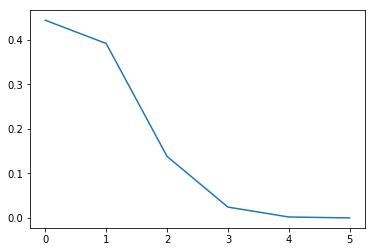

In [182]:
k=np.arange(0,6)
n=5
p=0.15

binomial= binom.pmf(k,n,p)
plt.plot(k,binomial)




#### Explain what you observe from the plot above

Es un método discreto

#### Now plot PMP with 50, 500, and 5000 visitors.

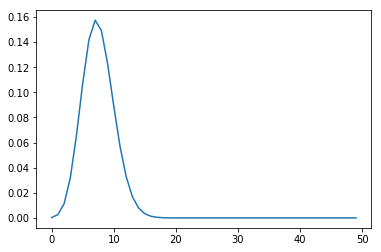

In [10]:

n=50
p=0.15
k=np.arange(0,n)
binomial= binom.pmf(k,n,p)
plt.plot(k,binomial)


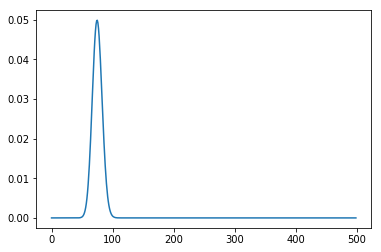

In [11]:
n=500
p=0.15
k=np.arange(0,n)
binomial= binom.pmf(k,n,p)
plt.plot(k,binomial)

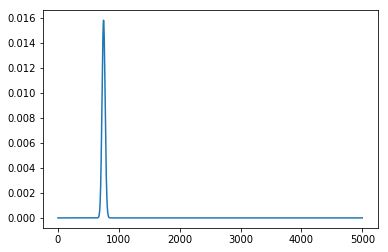

In [12]:
n=5000
p=0.15
k=np.arange(0,n)
binomial= binom.pmf(k,n,p)
plt.plot(k,binomial)

#### What did you notice from the distribution plots? Comment your findings.

A medida que aumenta la muestra la probabilidad de toda la muestra haga click en un anuncio es cero. Por otro lado la probabilidad de los que hacen click es cada vez menor


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

En teoría de probabilidad y estadística, la distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos "raros". La distribución de Poisson es el caso límite de la distribución binomial. De hecho, si los parámetros n y θ {\displaystyle \theta } \theta de una distribución binomial tienden a infinito (en el caso de 'n') y a cero (en el caso de θ {\displaystyle \theta } \theta ) de manera que λ = n θ {\displaystyle \!\lambda =n\theta } {\displaystyle \!\lambda =n\theta } se mantenga constante, la distribución límite obtenida es de Poisson. 

La distribución de Poisson recoge sucesos independientes que ocurren en un soporte continuo. El número medio de sucesos por unidad de soporte se le conoce como λ y caracteriza la distribución. poisson nos permite crear distribuciones de este tipo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [172]:
mean = 300
x = 320
poisson.pmf(x, mean)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [173]:
mean = 300
x = 60
poisson.pmf(x, mean)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

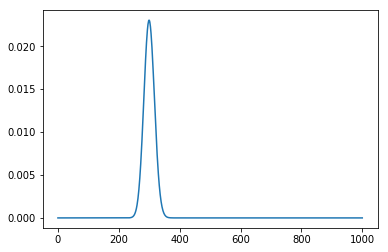

In [177]:
n=1000
k=np.arange(0,n)
m=300

x = list(range(1001))
y = [poisson.pmf(e, mean) for e in x] # poisson.pmf(x, mean)
plt.plot(x,y)
